# Task 8 (Extended). Practical analysis of advanced algorithms

### Goal
Practical analysis of advanced algorithms
### Book: 
Thomas H. Cormen Charles E. Leiserson Ronald L. Rivest Clifford Stein
Introduction to Algorithms Third Edition, 2009 (or other editions).

In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as r
from collections import defaultdict
import scipy.sparse as sp

In [19]:
# Generate a random adjacency matrix
n_V = 100
n_E = 500
n = n_E
adj_mtrx = np.zeros((n_V, n_V))

# with assigned random positive integer weights
while n != 0:
    i, j = np.random.randint(0, 99), np.random.randint(0, 99)
    if i != j and adj_mtrx[i, j] == 0:
        weight = np.random.randint(0, 99)
        adj_mtrx[i, j], adj_mtrx[j, i] = weight, weight
        n -= 1

print(f'Shape: {adj_mtrx.shape}, weight sum: {np.sum(adj_mtrx)}')

Shape: (100, 100), weight sum: 49008.0


In [20]:
# Transfer the matrix into an adjacency list
adj_lst = {i: [] for i in range(n_V)}
for k, v in adj_lst.items():
    for i in range(n_V):
        adj_lst[k].append([i, adj_mtrx[k, i]]) if adj_mtrx[k, i] != 0 else next

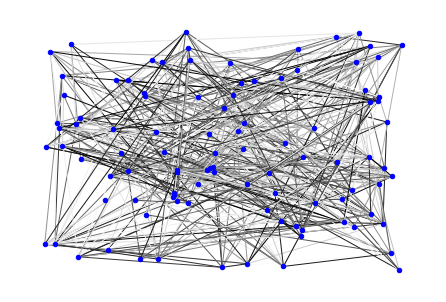

In [22]:
#Graph parameters
def get_matrix_triad(coo_matrix , data=False):
    if not sp.isspmatrix_coo(coo_matrix):
        coo_matrix = sp.coo_matrix(coo_matrix)
    temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
    return temp.tolist()
edags = get_matrix_triad(adj_mtrx)

#Graph visualization
G = nx.Graph()
H = nx.path_graph(adj_mtrx.shape[0])
G.add_nodes_from(H)
G.add_weighted_edges_from(edags)
colors = np.arange(adj_mtrx.shape[0])
edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
nx.draw(G,pos=nx.random_layout(G),node_color='b', node_size = 20, edgelist=edges, edge_color=weights, width=1.0, edge_cmap=plt.cm.Greys)
plt.show()


In [23]:
#Floyd algorythm test
Floyd_paths = nx.algorithms.shortest_paths.floyd_warshall(G, 'weight')
print('Floyd–Warshall algorithm result for the 39th node: \n'  + str(Floyd_paths[39]))
print('\Floyd–Warshall algorithm can show the shortest path between 39th and 73th nodes: \n'  + str(Floyd_paths[39][73]))
print('\nOr the path between any other nodes, for example between 3st and 21th: \n'  + str(Floyd_paths[3][21]))

Floyd–Warshall algorithm result for the 39th node: 
defaultdict(<function floyd_warshall_predecessor_and_distance.<locals>.<lambda>.<locals>.<lambda> at 0x7f05cfc35550>, {39: 0, 8: 23.0, 9: 16.0, 53.0: 28.0, 61.0: 36.0, 66.0: 54.0, 74.0: 27.0, 93.0: 42.0, 97.0: 16.0, 0: 49.0, 1: 35.0, 2: 54.0, 3: 40.0, 4: 34.0, 5: 56.0, 6: 68.0, 7: 28.0, 10: 44.0, 11: 26.0, 12: 42.0, 13: 58.0, 14: 49.0, 15: 52.0, 16: 30.0, 17: 43.0, 18: 26.0, 19: 62.0, 20: 19.0, 21: 18.0, 22: 40.0, 23: 53.0, 24: 64.0, 25: 30.0, 26: 68.0, 27: 39.0, 28: 31.0, 29: 21.0, 30: 44.0, 31: 35.0, 32: 53.0, 33: 35.0, 34: 30.0, 35: 54.0, 36: 23.0, 37: 37.0, 38: 37.0, 40: 23.0, 41: 52.0, 42: 43.0, 43: 40.0, 44: 80.0, 45: 55.0, 46: 75.0, 47: 43.0, 48: 31.0, 49: 37.0, 50: 62.0, 51: 29.0, 52: 48.0, 54: 35.0, 55: 41.0, 56: 53.0, 57: 37.0, 58: 42.0, 59: 52.0, 60: 33.0, 62: 36.0, 63: 54.0, 64: 42.0, 65: 61.0, 67: 73.0, 68: 49.0, 69: 43.0, 70: 41.0, 71: 32.0, 72: 46.0, 73: 36.0, 75: 56.0, 76: 27.0, 77: 44.0, 78: 39.0, 79: 62.0, 80: 37.0, 

In [24]:
#Johnson algorythm test
Johnson_paths = nx.algorithms.shortest_paths.johnson(G, 'weight')
print('Johnson algorithm result for the 39th node: \n'  + str(Johnson_paths[39]))
print('\nJohnson algorithm can show the shortest path between 39th and 73th nodes: \n'  + str(Johnson_paths[39][73]))
print('\nOr the path between any other nodes, for example between 3st and 21th: \n'  + str(Johnson_paths[3][21]))

Johnson algorithm result for the 39th node: 
{39: [39], 8.0: [39, 8.0], 9.0: [39, 9.0], 53.0: [39, 9.0, 87.0, 83.0, 53.0], 61.0: [39, 61.0], 66.0: [39, 97.0, 21.0, 36.0, 25.0, 66.0], 74.0: [39, 74.0], 93.0: [39, 9.0, 86.0, 37.0, 93.0], 97.0: [39, 97.0], 1.0: [39, 8.0, 1.0], 5.0: [39, 97.0, 78.0, 12.0, 5.0], 18.0: [39, 9.0, 18.0], 30.0: [39, 9.0, 87.0, 20.0, 11.0, 22.0, 30.0], 37.0: [39, 9.0, 86.0, 37.0], 43.0: [39, 9.0, 43.0], 49.0: [39, 9.0, 49.0], 59.0: [39, 9.0, 59.0], 60.0: [39, 9.0, 87.0, 83.0, 53.0, 60.0], 62.0: [39, 9.0, 62.0], 77.0: [39, 8.0, 71.0, 77.0], 86.0: [39, 9.0, 86.0], 87.0: [39, 9.0, 87.0], 13.0: [39, 97.0, 13.0], 21.0: [39, 97.0, 21.0], 68.0: [39, 8.0, 68.0], 78.0: [39, 97.0, 78.0], 80.0: [39, 97.0, 80.0], 92.0: [39, 9.0, 87.0, 20.0, 11.0, 81.0, 92.0], 98.0: [39, 9.0, 87.0, 83.0, 53.0, 98.0], 11.0: [39, 9.0, 87.0, 20.0, 11.0], 20.0: [39, 9.0, 87.0, 20.0], 28.0: [39, 9.0, 87.0, 83.0, 53.0, 28.0], 71.0: [39, 8.0, 71.0], 75.0: [39, 9.0, 49.0, 75.0], 79.0: [39, 9.0, 87.0

In [25]:
import timeit
from scipy.optimize import curve_fit

def fw_timestamps(n_runs, n_experiments):
    timestamps = []
    for runs in range(n_runs):
        timestamps.append([])
        for experiments in range(5, n_experiments + 1):
            
            matrix=np.zeros((experiments, experiments))
            n = experiments * 5

            while n > 0:
                i = r.randint(0,experiments-1)
                j = r.randint(0,experiments-1)
                if i != j and matrix[i,j] != 1:
                    numb = r.randint(1,100)
                    matrix[i,j]=numb
                    matrix[j,i]=numb
                    n -= 1

            adjlist = defaultdict(list)
            edges = set()
            for i, v in enumerate(matrix, 1):
                for j, u in enumerate(v, 1):
                    if u != 0 and frozenset([i, j]) not in edges:
                        edges.add(frozenset([i, j]))
                        adjlist[i].append(j)

            def get_matrix_triad(coo_matrix , data=False):
                if not sp.isspmatrix_coo(coo_matrix):
                    coo_matrix = sp.coo_matrix(coo_matrix)
                temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
                return temp.tolist()
            edags = get_matrix_triad(matrix)
            
            G = nx.Graph()
            H = nx.path_graph(matrix.shape[0])
            G.add_nodes_from(H)
            G.add_weighted_edges_from(edags)

            start_time = timeit.default_timer()
            nx.algorithms.shortest_paths.floyd_warshall(G, 'weight')
            timestamps[runs].append(timeit.default_timer() - start_time)
    timestamps_mean = np.array(timestamps, dtype=np.float64).mean(axis=0)
    return timestamps_mean

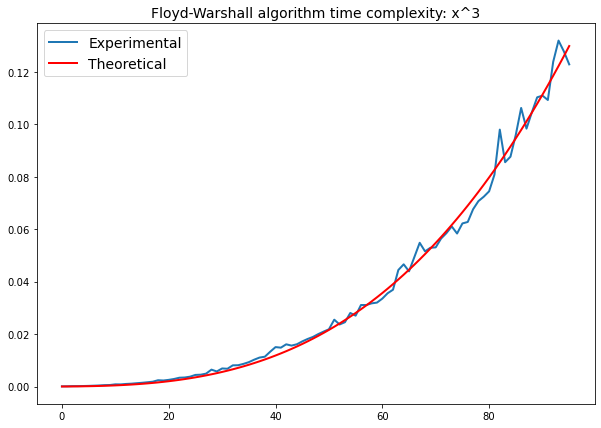

In [26]:
def cubic_function(x, a):
    return a * x ** 3

avg_time = fw_timestamps(5, 100)

xdata = np.arange(5, len(avg_time)+5, dtype=np.float64)
ydata = np.array(avg_time, dtype=np.float64)
popt, pcov = curve_fit(cubic_function, xdata, ydata)

plt.figure(figsize=(10,7))
plt.plot(avg_time, linewidth=2)
plt.title("Floyd-Warshall algorithm time complexity: x^3", fontsize=14)
plt.plot(xdata-5, cubic_function(xdata, *popt), 'r', linewidth=2)
plt.legend(["Experimental", "Theoretical"], fontsize=14)
plt.show()

In [27]:
def johnson_timestamps(n_runs, n_experiments):
    timestamps = []
    for runs in range(n_runs):
        timestamps.append([])
        for experiments in range(5, n_experiments + 1):
            
            matrix=np.zeros((experiments, experiments))
            n = experiments * 5

            while n > 0:
                i = r.randint(0,experiments-1)
                j = r.randint(0,experiments-1)
                if i != j and matrix[i,j] != 1:
                    numb = r.randint(1,100)
                    matrix[i,j]=numb
                    matrix[j,i]=numb
                    n -= 1

            adjlist = defaultdict(list)
            edges = set()
            for i, v in enumerate(matrix, 1):
                for j, u in enumerate(v, 1):
                    if u != 0 and frozenset([i, j]) not in edges:
                        edges.add(frozenset([i, j]))
                        adjlist[i].append(j)

            def get_matrix_triad(coo_matrix , data=False):
                if not sp.isspmatrix_coo(coo_matrix):
                    coo_matrix = sp.coo_matrix(coo_matrix)
                temp = np.vstack((coo_matrix.row , coo_matrix.col , coo_matrix.data)).transpose()
                return temp.tolist()
            edags = get_matrix_triad(matrix)
            
            G = nx.Graph()
            H = nx.path_graph(matrix.shape[0])
            G.add_nodes_from(H)
            G.add_weighted_edges_from(edags)

            start_time = timeit.default_timer()
            nx.algorithms.shortest_paths.johnson(G, 'weight')
            timestamps[runs].append(timeit.default_timer() - start_time)
    timestamps_mean = np.array(timestamps, dtype=np.float64).mean(axis=0)
    return timestamps_mean

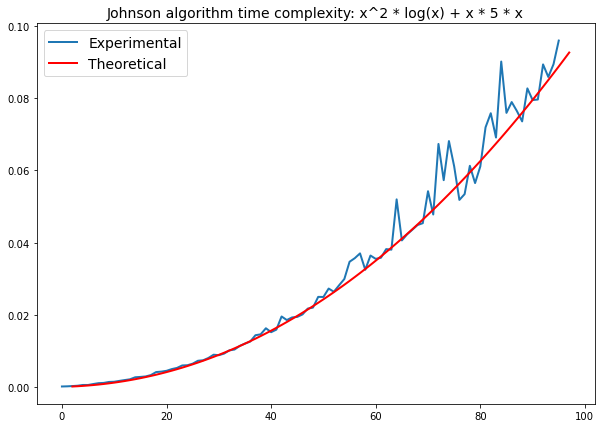

In [28]:
def special_function(x, a):
    return a * (x ** 2 * np.log(x) + x * 5 * x)

avg_time = johnson_timestamps(5, 100)

xdata = np.arange(5, len(avg_time)+5, dtype=np.float64)
ydata = np.array(avg_time, dtype=np.float64)
popt, pcov = curve_fit(special_function, xdata, ydata)

plt.figure(figsize=(10,7))
plt.plot(avg_time, linewidth=2)
plt.title("Johnson algorithm time complexity: x^2 * log(x) + x * 5 * x", fontsize=14)
plt.plot(xdata-3, special_function(xdata, *popt), 'r', linewidth=2)
plt.legend(["Experimental", "Theoretical"], fontsize=14)
plt.show()